In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import Dataset 'Olympic games'

In [4]:
df_events = pd.read_csv('athlete_events.csv')
df_regions = pd.read_csv('noc_regions.csv')


In [5]:
df_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
df_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
df_events.shape

(271116, 15)

In [8]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [9]:
df_events.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [10]:
#Data describe
df_events.describe() #but I don't want ID,Year columns so,
df_events[['Age','Height','Weight']].describe()

,Age,Height,Weight
count,261642.000000,210945.000000,208241.000000
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


In [12]:
df_events.dtypes


ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

C:\Users\M.Ysossief\AppData\Local\Temp\ipykernel_1744\1932739514.py:1: FutureWarning: 

The `scale` parameter has been renamed to `width_method` and will be removed in v0.15. Pass `width_method='linear' for the same effect.
  sns.boxenplot(x="Height", y="Weight",


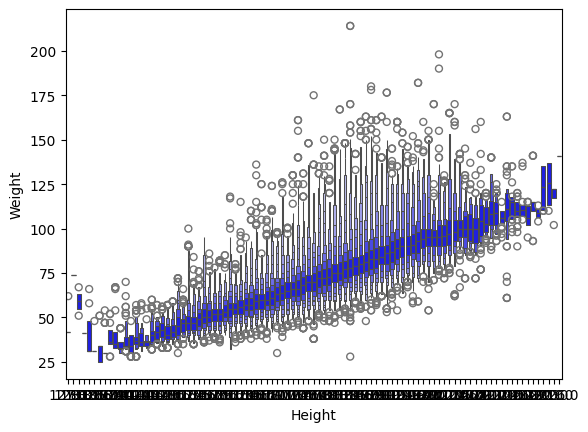

In [20]:
sns.boxenplot(x="Height", y="Weight",
              color="b",
              scale="linear", data=df_events)
plt.show()

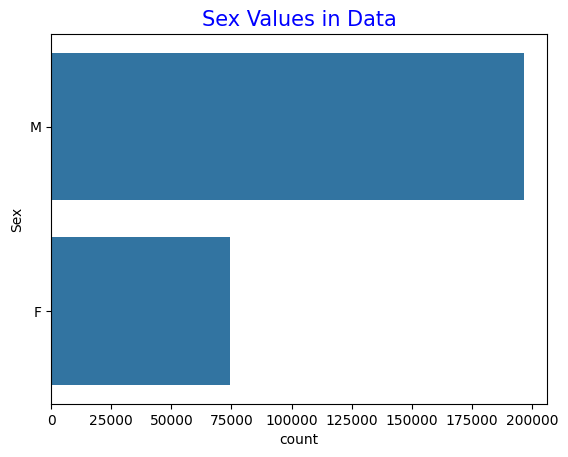

In [15]:
#First column is Sex.now I make analysis this one.
df_events.Sex.unique() #M,F, non null
df_events.Sex.value_counts() #M=196594 , F=74522 values
sns.countplot(df_events.Sex)
plt.title('Sex Values in Data',size=15,color='Blue')
plt.show()

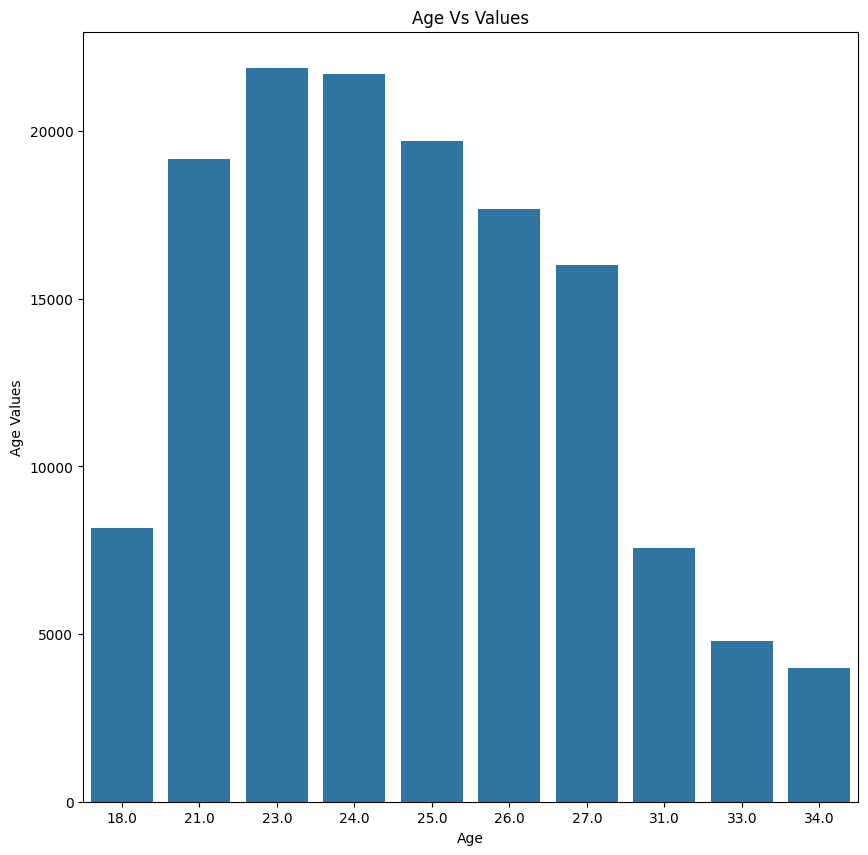

In [16]:
ages=df_events['Age'].unique()
ages=pd.DataFrame(ages,columns=['Ages'])
ages=ages.sort_index()
#We second columns is Age.I will analysis
sum_of_ages=[]
for age in df_events.Age.unique():
    sum_of_ages.append(sum(df_events[df_events['Age']==age].Age.value_counts()))

sum_of_ages=pd.DataFrame(sum_of_ages,columns=['Ages_Count']) 

sum_of_ages[:10]
ages[:10]

data_age=pd.concat([ages[:10],sum_of_ages[:10]],axis=1) #We concat age,age counts in Data because while show them in barplot

data_age
#We count the ages just unique
plt.figure(figsize=(10,10))
sns.barplot(x=data_age.Ages,y=data_age.Ages_Count)
plt.xlabel('Age')
plt.ylabel('Age Values')
plt.title('Age Vs Values')
plt.show()

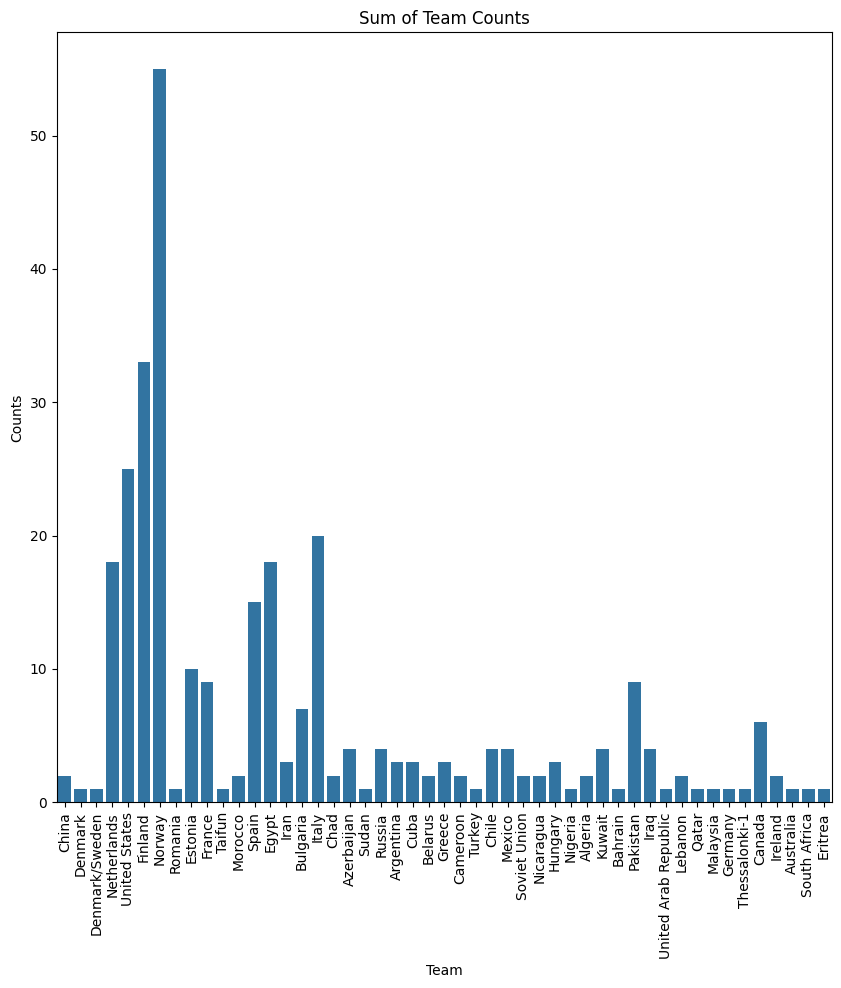

In [17]:
#Now, I will show Team counts in every year
plt.figure(figsize=(10,10))
sns.countplot(x=df_events.Team[:300])
plt.xlabel('Team')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.title('Sum of Team Counts')
plt.show()

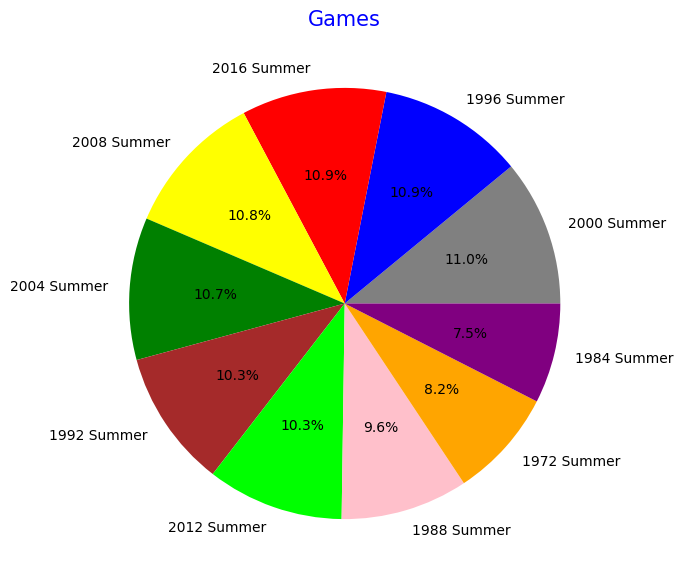

In [18]:
df_events.Games.unique()
all_of_games=df_events.Games.value_counts()
colors = ['grey','blue','red','yellow','green','brown','lime','pink','orange','purple']
explode = [0,0,0,0,0,0,0,0,0,0]
plt.figure(figsize = (7,7))
plt.pie(all_of_games.values[:10], explode=explode, labels=all_of_games.index[:10], colors=colors, autopct='%1.1f%%')
plt.title('Games',color = 'blue',fontsize = 15)
plt.show()